In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import ticker
from matplotlib import colors
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
import quicklook

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
def get_vars_at_depth(dirname, fname, maskname, time_ind):
    
    filesU = general_functions.get_files(dirname, fname, 'grid_U')
    y,x = slice(1,-1,None), slice(1,-1,None)

    with scDataset(filesU) as dsU:
        vozocrtx0 = dsU.variables['vozocrtx'][time_ind,:,y,x]

    with nc.Dataset(os.path.join(dirname, maskname), 'r') as dsM:
        umask = dsM.variables['umask'][0,:,y,x]
        e1u = dsM.variables['e1u'][0, y, x]
        e2u = dsM.variables['e2u'][0, y, x]
        e3u = dsM.variables['e3u_0'][0, :, y, x]

    vozocrtx = np.ma.array(vozocrtx0, mask=1 - umask)
    
    return vozocrtx, umask, e1u, e2u, e3u

In [4]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/initial_collection/ideal_half_flt/'
dirname_n = '/ocean/imachuca/Canyons/results_mackenzie/initial_collection/ideal_half_nocanyon/'

fname = "MCKNZ_1h_20170101_20170120_*"
maskname = 'mesh_mask.nc'

In [5]:
rho = 1000
hours = (24 * 5) - 1
tot = np.full(hours, np.nan)
tot_n = np.full(hours, np.nan)

for time_ind in range(hours):

    vozocrtx, umask, e1u, e2u, e3u = get_vars_at_depth(dirname, fname, maskname, time_ind)
    vozocrtx_n, umask_n, e1u_n, e2u_n, e3u_n = get_vars_at_depth(dirname_n, fname, maskname, time_ind)

    vozocrtx2, umask, e1u, e2u, e3u = get_vars_at_depth(dirname, fname, maskname, time_ind+1)
    vozocrtx_n2, umask_n, e1u_n, e2u_n, e3u_n = get_vars_at_depth(dirname_n, fname, maskname, time_ind+1)
    
    moment = np.full_like(umask, np.nan)
    for z in range(umask.shape[0]):
        moment[z, :, :] = (vozocrtx2[z, :, :] - vozocrtx[z, :, :]) * e1u[:, :] * e2u[:, :] * e3u[z, :, :] * rho

    moment_n = np.full_like(vozocrtx, np.nan)
    for z in range(vozocrtx.shape[0]):
        moment_n[z, :, :] = (vozocrtx_n2[z, :, :] - vozocrtx_n[z, :, :]) * e1u_n[:, :] * e2u_n[:, :] * e3u_n[z, :, :] * rho

    tot[time_ind] = np.sum(moment)
    tot_n[time_ind] = np.sum(moment_n)
    
    if time_ind % 12 == 0:
        print(time_ind)
        
deficit = tot - tot_n
#d_deficit = np.diff(deficit)
d_time = 60*60
#deficit_rate = d_deficit / d_time
deficit_rate = deficit/d_time

0
12
24
36
48
60
72
84
96
108


# Results

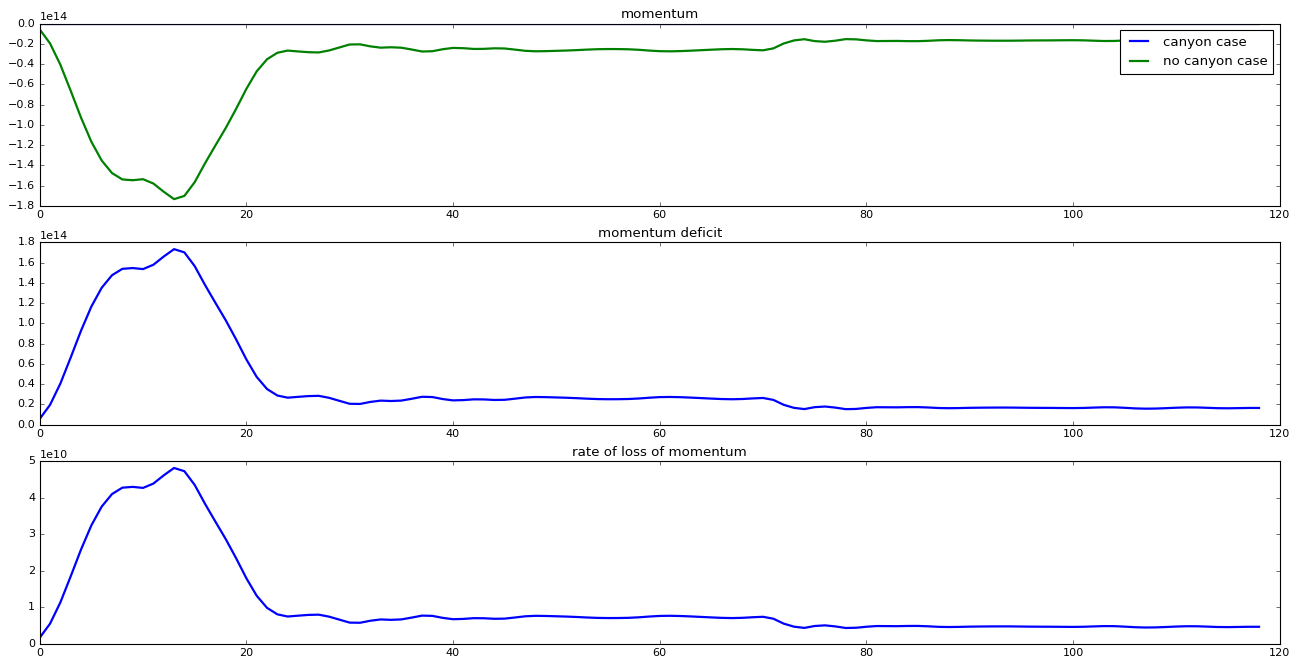

In [8]:
xs = np.arange(len(deficit_rate))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 10))
ax1.plot(xs, tot, lw=2, label = 'canyon case')
ax1.plot(xs, tot_n, lw=2, label = 'no canyon case')
ax1.set_title('momentum')
ax1.legend()

ax2.plot(xs, deficit, lw=2)
ax2.set_title('momentum deficit')

ax3.plot(xs, deficit_rate, lw=2)
ax3.set_title('rate of loss of momentum')

In [ ]:
deficit_rate